<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/pytorch/lecture_11_build_models_sentdex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Based on Video [Sentdex](https://www.youtube.com/watch?v=i2yPxY2rOzs)

In [30]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

# Building Model class

In [12]:
train = datasets.MNIST("", train=True, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )
test  = datasets.MNIST("", train=False, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )

Making DataLoader for one batch a time.

In [13]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [21]:
for data in trainset:
  print(len(data))
  break

2


In [26]:
x, y  = data[0][0], data[1][0]

In [27]:
import matplotlib.pyplot as plt

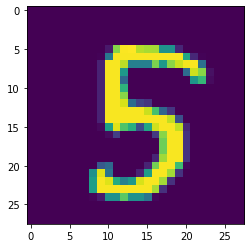

In [29]:
plt.imshow(x[0])

 Video Lecture [part 3](https://www.youtube.com/watch?v=ixathu7U-LQ)

In [36]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() 
    # it is super init, when we inherit a class(here nn.Module), 
    # all the modules except __init__ gets inherited. 
    # To inherit init, we need to run super init.

    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    x = F.log_softmax(x, dim=1)

    return x
  


In [37]:
model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [47]:
X = torch.rand(28, 28)
X = X.view(-1, 28*28)


In [48]:
output = model(X)
output

tensor([[-2.2257, -2.1884, -2.2597, -2.2513, -2.4032, -2.2709, -2.4168, -2.3767,
         -2.3492, -2.3114]], grad_fn=<LogSoftmaxBackward0>)

In [52]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 3

for _ in range(EPOCHS):
  for data in trainset:
    X, y = data
    model.zero_grad()
    output = model(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) 
    # if data is one hot [0,1,0,0,0..] use mean sqrd error as loss
    # if data is scaler like [4], use nll_loss.
    loss.backward() 
    # Can you handcode backward? Yes, iterate over model.parameters() and calculate delta and compute as per adam
    optimizer.step()
  print(loss)


tensor(0.4284, grad_fn=<NllLossBackward0>)
tensor(0.0355, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)


In [56]:
total = 0
correct = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = model(X.view(-1, 28*28))
    for idx, i  in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct += 1
      total += 1
    print(total, correct)


Streaming output truncated to the last 5000 lines.
10010 9831
10020 9841
10030 9851
10040 9860
10050 9870
10060 9880
10070 9890
10080 9900
10090 9909
10100 9919
10110 9929
10120 9939
10130 9949
10140 9959
10150 9968
10160 9978
10170 9988
10180 9998
10190 10008
10200 10018
10210 10027
10220 10037
10230 10047
10240 10057
10250 10067
10260 10077
10270 10087
10280 10096
10290 10106
10300 10116
10310 10126
10320 10136
10330 10146
10340 10156
10350 10166
10360 10175
10370 10185
10380 10195
10390 10205
10400 10215
10410 10225
10420 10235
10430 10245
10440 10255
10450 10265
10460 10275
10470 10285
10480 10294
10490 10304
10500 10314
10510 10323
10520 10333
10530 10343
10540 10353
10550 10363
10560 10373
10570 10383
10580 10393
10590 10403
10600 10413
10610 10423
10620 10433
10630 10443
10640 10453
10650 10463
10660 10473
10670 10483
10680 10493
10690 10503
10700 10513
10710 10523
10720 10533
10730 10543
10740 10553
10750 10563
10760 10573
10770 10583
10780 10593
10790 10603
10800 10613
10810 1

In [60]:
print("Accuracy", round(correct/total,4))

Accuracy 0.9805


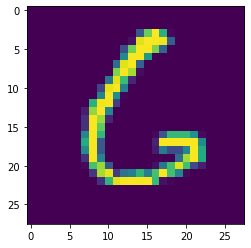

In [83]:
idx = 2
plt.imshow(X[idx].view(28,28))

In [84]:
torch.argmax(model(X[idx].view(-1,28*28)))

tensor(6)

In [75]:
X[0].view(-1,28*28)[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.2000, 0.9608, 0.9216, 0.1490, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 